In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from torchvision.datasets import ImageFolder
from torch.autograd import Variable
import cv2
from google.colab.patches import cv2_imshow


# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(root=data_dir, transform=transform)  # Use the provided path here

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# Set your dataset directory
data_dir = '/content/train'  # Path is used here
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])



In [ ]:
!python -m pip install cityscapesscripts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.6/473.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.3 MB/s eta 0:00:00
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26306 sha256=761049f10b217fbdcffeae8bc66f8866d7b0e5e7db5a72c28bc4ec5ef1ff8949
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built typing


In [ ]:
!python -m pip install cityscapesscripts

In [ ]:
!python -m pip install cityscapesscripts[gui]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 10.3 MB/s eta 0:00:00


In [ ]:
import cityscapesscripts.helpers.labels as labels


In [ ]:
model = torch.hub.load('facebookresearch/semi-supervised-ImageNet1K-models', 'resnet50_swsl')  # Example using a semi-supervised ResNet50
model.fc = nn.Linear(2048, 2)  # Modify for 2 classes
model.eval()


Downloading: "https://github.com/facebookresearch/semi-supervised-ImageNet1K-models/zipball/master" to /root/.cache/torch/hub/master.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 141MB/s]
Downloading: "https://dl.fbaipublicfiles.com/semiweaksu

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
class_labels = labels.id2label


In [ ]:
!git clone https://github.com/mcordts/cityscapesScripts

Cloning into 'cityscapesScripts'...
remote: Enumerating objects: 648, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 648 (delta 183), reused 169 (delta 158), pack-reused 427
Receiving objects: 100% (648/648), 795.36 KiB | 3.50 MiB/s, done.
Resolving deltas: 100% (369/369), done.


In [ ]:
import shutil
sorce = "/content/cityscapesScripts"
destination="/content/drive/MyDrive/CityScape"
shutil.copytree(sorce,destination,dirs_exist_ok=True)

'/content/drive/MyDrive/CityScape'

Using cache found in /root/.cache/torch/hub/facebookresearch_semi-supervised-ImageNet1K-models_master


<IPython.core.display.Javascript object>

Saved to photo.jpg
Prediction: Label(name='unlabeled', id=0, trainId=255, category='void', categoryId=0, hasInstances=False, ignoreInEval=True, color=(0, 0, 0))


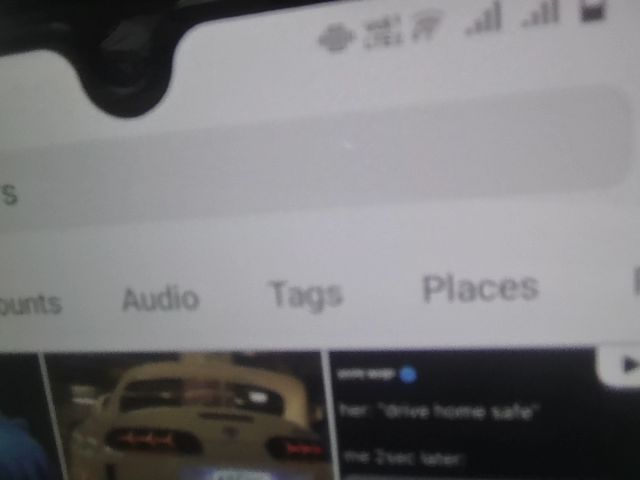

In [ ]:
import cv2
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
from IPython.display import display, Javascript, Image as IPImage
from google.colab.output import eval_js
from base64 import b64decode
import cityscapesscripts.helpers.labels as labels

# 1. Install or check for required libraries
# !pip install cityscapesscripts  # If not already installed

# 2. Load the pre-trained model (adjust path if different)
model = torch.hub.load('facebookresearch/semi-supervised-ImageNet1K-models', 'resnet50_swsl')  # Example using a semi-supervised ResNet50
model.fc = nn.Linear(2048, 2)  # Modify for 2 classes
model.eval()

# 3. Define image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 4. Get class labels from Cityscapes
class_labels = labels.id2label

# 5. Define the take_photo function
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        const stream = await navigator.mediaDevices.getUserMedia({ video: true });

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for the Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);

        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)

    # Use JavaScript to capture a photo and save it
    data = eval_js('takePhoto({})'.format(quality))
    binary_data = b64decode(data.split(',')[1])

    # Remove special characters from the filename
    filename = ''.join(c for c in filename if c.isalnum() or c in ['_', '.'])

    with open(filename, 'wb') as f:
        f.write(binary_data)

    return filename

# 6. Main execution with error-checking
try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Load the captured image as a PIL Image
    pil_image = Image.open(filename)

    # Preprocess the image
    frame_tensor = transform(pil_image).unsqueeze(0)
    if frame_tensor is None:  # Check for valid preprocessing output
        raise ValueError("Preprocessing produced a None output!")

    # Make prediction
    with torch.no_grad():
        output = model(frame_tensor)
        if output is None:  # Check for valid model output
            raise ValueError("Model returned a None output!")

    # Extract predicted class
    _, predicted = torch.max(output.data, 1)
    label_id = predicted.item()
    label_name = class_labels[label_id] if label_id in class_labels else f'Class {label_id}'

    # Display result on the frame
    print(f'Prediction: {label_name}')

    # Display the resulting frame
    display(IPImage(filename=filename))

except Exception as err:
    print("Error encountered:", str(err))

finally:
    # Release resources
    cv2.destroyAllWindows()


In [ ]:
import cv2
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
from IPython.display import display, Javascript, Image as IPImage
from google.colab.output import eval_js
from base64 import b64decode

# 1. Install or check for required libraries
# !pip install cityscapesscripts  # If not already installed

# 2. Load the pre-trained model (adjust path if different)
model = torch.hub.load('facebookresearch/semi-supervised-ImageNet1K-models', 'resnet50_swsl')  # Example using a semi-supervised ResNet50
model.fc = nn.Linear(2048, 2)  # Modify for 2 classes
model.eval()

# 3. Define image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 4. Get class labels from Cityscapes
class_labels = {0: 'Non-Emergency Vehicle', 1: 'Emergency Vehicle'}

# 5. Define the take_photo function
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        const stream = await navigator.mediaDevices.getUserMedia({ video: true });

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for the Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);

        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)

    # Use JavaScript to capture a photo and save it
    data = eval_js('takePhoto({})'.format(quality))
    binary_data = b64decode(data.split(',')[1])

    # Remove special characters from the filename
    filename = ''.join(c for c in filename if c.isalnum() or c in ['_', '.'])

    with open(filename, 'wb') as f:
        f.write(binary_data)

    return filename

# 6. Main execution with error-checking
try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Load the captured image as a PIL Image
    pil_image = Image.open(filename)

    # Preprocess the image
    frame_tensor = transform(pil_image).unsqueeze(0)
    if frame_tensor is None:  # Check for valid preprocessing output
        raise ValueError("Preprocessing produced a None output!")

    # Make prediction
    with torch.no_grad():
        output = model(frame_tensor)
        if output is None:  # Check for valid model output
            raise ValueError("Model returned a None output!")

    # Extract predicted class
    _, predicted = torch.max(output.data, 1)
    label_id = predicted.item()
    label_name = class_labels[label_id] if label_id in class_labels else f'Class {label_id}'

    # Display result on the frame
    print(f'Prediction: {label_name}')

    # Display the resulting frame
    display(IPImage(filename=filename))

except Exception as err:
    print("Error encountered:", str(err))

finally:
    # Release resources
    cv2.destroyAllWindows()


In [ ]:
import cv2
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
from IPython.display import display, Javascript, Image as IPImage
from google.colab.output import eval_js
from base64 import b64decode

# 1. Install or check for required libraries
# !pip install cityscapesscripts  # If not already installed

# 2. Load the pre-trained model (adjust path if different)
model = torch.hub.load('facebookresearch/semi-supervised-ImageNet1K-models', 'resnet50_swsl')  # Example using a semi-supervised ResNet50
model.fc = nn.Linear(2048, 2)  # Modify for 2 classes
model.eval()

# 3. Define image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 4. Get class labels from Cityscapes
class_labels = {0: 'Non-Emergency Vehicle', 1: 'Emergency Vehicle'}
emergency_vehicles = ["ambulance", "police", "fire truck"]
non_emergency_vehicles = ["bus", "bicycle", "truck", "car"]

# 5. Define the take_photo function
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        const stream = await navigator.mediaDevices.getUserMedia({ video: true });

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for the Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);

        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)

    # Use JavaScript to capture a photo and save it
    data = eval_js('takePhoto({})'.format(quality))
    binary_data = b64decode(data.split(',')[1])

    # Remove special characters from the filename
    filename = ''.join(c for c in filename if c.isalnum() or c in ['_', '.'])

    with open(filename, 'wb') as f:
        f.write(binary_data)

    return filename

# 6. Main execution with error-checking
try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Load the captured image as a PIL Image
    pil_image = Image.open(filename)

    # Preprocess the image
    frame_tensor = transform(pil_image).unsqueeze(0)
    if frame_tensor is None:  # Check for valid preprocessing output
        raise ValueError("Preprocessing produced a None output!")

    # Make prediction
    with torch.no_grad():
        output = model(frame_tensor)
        if output is None:  # Check for valid model output
            raise ValueError("Model returned a None output!")

    # Extract predicted class
    _, predicted = torch.max(output.data, 1)
    label_id = predicted.item()
    label_name = class_labels[label_id] if label_id in class_labels else f'Class {label_id}'

    # Display result on the frame
    print(f'Prediction: {label_name}')

    # Display the resulting frame
    display(IPImage(filename=filename))

except Exception as err:
    print("Error encountered:", str(err))

finally:
    # Release resources
    cv2.destroyAllWindows()


In [ ]:
!pip install pyserial



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 1.1 MB/s eta 0:00:00


In [ ]:
!pip install serial
import serial


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 692.3 kB/s eta 0:00:00


In [ ]:
import serial
arduino = serial.Serial('Arduino Uno (COM3)', 9600)  # Replace with the actual port

AttributeError: module 'serial' has no attribute 'Serial'

In [ ]:
import cv2
import torch
import torch.nn as nn
from torchvision import transforms, models
from PIL import Image
from IPython.display import display, Javascript, Image as IPImage
from google.colab.output import eval_js
from base64 import b64decode
import serial

# Load the pre-trained model (adjust path if different)
model = torch.hub.load('facebookresearch/semi-supervised-ImageNet1K-models', 'resnet50_swsl')
model.fc = nn.Linear(2048, 2)  # Modify for 2 classes
model.eval()

# Define image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Get class labels from Cityscapes
class_labels = {0: 'Non-Emergency Vehicle', 1: 'Emergency Vehicle'}
emergency_vehicles = ["ambulance", "police", "fire truck"]
non_emergency_vehicles = ["bus", "bicycle", "truck", "car"]

# Define the take_photo function
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        const stream = await navigator.mediaDevices.getUserMedia({ video: true });

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for the Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);

        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)

    # Use JavaScript to capture a photo and save it
    data = eval_js('takePhoto({})'.format(quality))
    binary_data = b64decode(data.split(',')[1])

    # Remove special characters from the filename
    filename = ''.join(c for c in filename if c.isalnum() or c in ['_', '.'])

    with open(filename, 'wb') as f:
        f.write(binary_data)

    return filename

# Initialize arduino to None
arduino = None

# Main execution with error-checking
try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Load the captured image as a PIL Image
    pil_image = Image.open(filename)

    # Preprocess the image
    frame_tensor = transform(pil_image).unsqueeze(0)
    if frame_tensor is None:  # Check for valid preprocessing output
        raise ValueError("Preprocessing produced a None output!")

    # Make prediction
    with torch.no_grad():
        output = model(frame_tensor)
        if output is None:  # Check for valid model output
            raise ValueError("Model returned a None output!")

    # Extract predicted class
    _, predicted = torch.max(output.data, 1)
    label_id = predicted.item()
    label_name = class_labels[label_id] if label_id in class_labels else f'Class {label_id}'

    # Send vehicle type to Arduino
    if label_name == "Emergency Vehicle":
        vehicle_type = 'E'  # Send 'E' for emergency
        print ("E")
    else:
        vehicle_type = 'N'  # Send 'N' for non-emergency
        print("N")

    # Connect to Arduino
    arduino = serial.Serial('com3', 9600)  # Adjust port if needed
    arduino.write(vehicle_type.encode())

    # Display result on the frame
    print(f'Prediction: {label_name}')

    # Display the resulting frame
    display(IPImage(filename=filename))

except Exception as err:
    print("Error encountered:", str(err))

finally:
    # Release resources
    cv2.destroyAllWindows()
    if arduino is not None:
        arduino.close()  # Close serial connection


Using cache found in /root/.cache/torch/hub/facebookresearch_semi-supervised-ImageNet1K-models_master


<IPython.core.display.Javascript object>

Saved to photo.jpg
E
Error encountered: module 'serial' has no attribute 'Serial'


In [ ]:
# NOte 2 lo error vaste edhi paste cheyu -> model = torch.hub.load('facebookresearch/semi-supervised-ImageNet1K-models', 'resnet50_swsl')  # Example using a semi-supervised ResNet50
#model.fc = nn.Linear(2048, 2)  # Modify for 2 classes
#model.eval()

In [ ]:
model = torch.hub.load('facebookresearch/semi-supervised-ImageNet1K-models', 'resnet50_swsl')  # Example using a semi-supervised ResNet50
model.fc = nn.Linear(2048, 2)  # Modify for 2 classes
model.eval()

Using cache found in /root/.cache/torch/hub/facebookresearch_semi-supervised-ImageNet1K-models_master


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

**With Arduino and NGROK**


Using cache found in /root/.cache/torch/hub/facebookresearch_semi-supervised-ImageNet1K-models_master


<IPython.core.display.Javascript object>

Saved to photo.jpg
Prediction: Non-Emergency Vehicle


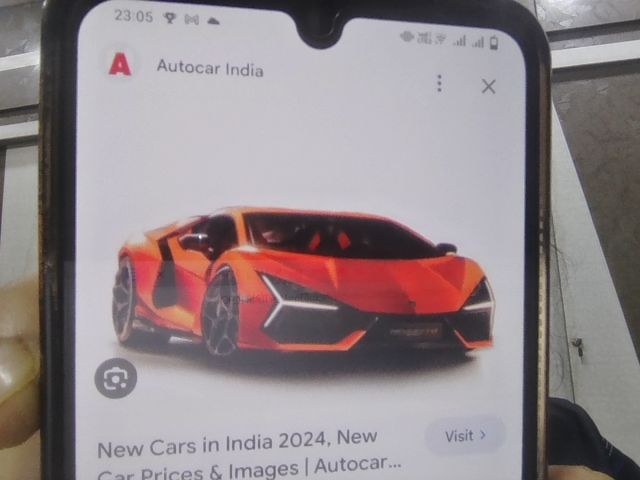

Closing connections or resources.


In [ ]:
import sys
import socket
from IPython.display import display, Javascript, Image as IPImage
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image
import requests

# Function to send a command to the local server
def send_command(command):
    ngrok_url = 'https://999e-2405-201-c01d-f0fe-4861-61e3-e358-c55c.ngrok-free.app'  # Use your ngrok server address

    url = f'{ngrok_url}'
    try:
        requests.post(url, data={'command': command})
        print(f'Successfully sent command: {command}')
    except Exception as e:
        print(f'Failed to send command. Error: {str(e)}')

# Load the pre-trained model (adjust path if different)
model = torch.hub.load('facebookresearch/semi-supervised-ImageNet1K-models', 'resnet50_swsl')
model.fc = nn.Linear(2048, 2)  # Modify for 2 classes
model.eval()

# Define image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Get class labels from Cityscapes
class_labels = {0: 'Non-Emergency Vehicle', 1: 'Emergency Vehicle'}
emergency_vehicles = ["ambulance", "police", "fire truck"]
non_emergency_vehicles = ["bus", "bicycle", "truck", "car"]

# Define the take_photo function
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        const stream = await navigator.mediaDevices.getUserMedia({ video: true });

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for the Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);

        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)

    # Use JavaScript to capture a photo and save it
    data = eval_js('takePhoto({})'.format(quality))
    binary_data = b64decode(data.split(',')[1])

    # Remove special characters from the filename
    filename = ''.join(c for c in filename if c.isalnum() or c in ['_', '.'])

    with open(filename, 'wb') as f:
        f.write(binary_data)

    return filename

try:
    # Capture an image
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Load the captured image as a PIL Image
    pil_image = Image.open(filename)

    # Preprocess the image
    frame_tensor = transform(pil_image).unsqueeze(0)
    if frame_tensor is None:  # Check for valid preprocessing output
        raise ValueError("Preprocessing produced a None output!")

    # Make prediction
    with torch.no_grad():
        output = model(frame_tensor)
        if output is None:  # Check for valid model output
            raise ValueError("Model returned a None output!")

    # Extract predicted class
    _, predicted = torch.max(output.data, 1)
    label_id = predicted.item()
    label_name = class_labels[label_id] if label_id in class_labels else f'Class {label_id}'

    # Display result on the frame
    print(f'Prediction: {label_name}')

    # Display the resulting frame
    display(IPImage(filename=filename))

    # Send vehicle type to local server
    if label_name == "Emergency Vehicle":
        vehicle_type = 'E'  # Send 'E' for emergency
        try:
            # Send the command to the local server
            send_command(vehicle_type)
            print("Signal sent to local server for Emergency Vehicle.")
        except Exception as server_err:
            print("Error communicating with the local server:", str(server_err))
            sys.exit()  # Stop execution
    else:
        vehicle_type = 'N'  # Send 'N' for non-emergency

finally:
    # Close any open connections or resources here
    print("Closing connections or resources.")


In [ ]:
import socket
from IPython.display import display, Javascript, Image as IPImage
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image
import requests

# Function to send a command to the local server
def send_command(command):
    ngrok_url = 'https://5bbc-2405-201-c01d-f0fe-147b-1390-ffeb-f3ba.ngrok-free.app'  # Use your ngrok server address

    url = f'{ngrok_url}'
    response = requests.post(url, data={'command': command})

    if response.status_code == 200:
        print(f'Successfully sent command: {command}')
    else:
        print(f'Failed to send command. Status code: {response.status_code}')

# Example usage:
send_command('E')  # Sending 'E' as the command


# Function to send a command to the local server
#def send_command(command):
   # client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
   # client_socket.connect(('9101-2405-201-c01d-f0fe-a9ee-b956-b1a4-dadf.ngrok-free.app ', 80))  # Use your ngrok server address and port
   # client_socket.send(command.encode())
   # client_socket.close()

# Load the pre-trained model (adjust path if different)
model = torch.hub.load('facebookresearch/semi-supervised-ImageNet1K-models', 'resnet50_swsl')
model.fc = nn.Linear(2048, 2)  # Modify for 2 classes
model.eval()

# Define image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Get class labels from Cityscapes
class_labels = {0: 'Non-Emergency Vehicle', 1: 'Emergency Vehicle'}
emergency_vehicles = ["ambulance", "police", "fire truck"]
non_emergency_vehicles = ["bus", "bicycle", "truck", "car"]

# Define the take_photo function
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        const stream = await navigator.mediaDevices.getUserMedia({ video: true });

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for the Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);

        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)

    # Use JavaScript to capture a photo and save it
    data = eval_js('takePhoto({})'.format(quality))
    binary_data = b64decode(data.split(',')[1])

    # Remove special characters from the filename
    filename = ''.join(c for c in filename if c.isalnum() or c in ['_', '.'])

    with open(filename, 'wb') as f:
        f.write(binary_data)

    return filename

# Capture an image
filename = take_photo()
print('Saved to {}'.format(filename))

# Load the captured image as a PIL Image
pil_image = Image.open(filename)

# Preprocess the image
frame_tensor = transform(pil_image).unsqueeze(0)
if frame_tensor is None:  # Check for valid preprocessing output
    raise ValueError("Preprocessing produced a None output!")

# Make prediction
with torch.no_grad():
    output = model(frame_tensor)
    if output is None:  # Check for valid model output
        raise ValueError("Model returned a None output!")

# Extract predicted class
_, predicted = torch.max(output.data, 1)
label_id = predicted.item()
label_name = class_labels[label_id] if label_id in class_labels else f'Class {label_id}'

# Send vehicle type to local server
if label_name == "Emergency Vehicle":
    vehicle_type = 'E'  # Send 'E' for emergency
    try:
        # Send the command to the local server
        send_command(vehicle_type)
        print("Signal sent to local server for Emergency Vehicle.")
    except Exception as server_err:
        print("Error communicating with the local server:", str(server_err))
else:
    vehicle_type = 'N'  # Send 'N' for non-emergency

# Display result on the frame
print(f'Prediction: {label_name}')

# Display the resulting frame
display(IPImage(filename=filename))




In [ ]:
import sys
import socket
from IPython.display import display, Javascript, Image as IPImage
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image
import requests
import threading

# Function to send a command to the local server
def send_command(command):
    ngrok_url = 'https://5bbc-2405-201-c01d-f0fe-147b-1390-ffeb-f3ba.ngrok-free.app'  # Use your ngrok server address

    url = f'{ngrok_url}'
    try:
        requests.post(url, data={'command': command})
        print(f'Successfully sent command: {command}')
    except Exception as e:
        print(f'Failed to send command. Error: {str(e)}')

# Function to capture an image
def capture_image():
    filename = 'photo.jpg'
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        const stream = await navigator.mediaDevices.getUserMedia({ video: true });

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for the Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);

        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)

    # Use JavaScript to capture a photo and save it
    data = eval_js('takePhoto({})'.format(0.8))
    binary_data = b64decode(data.split(',')[1])

    # Remove special characters from the filename
    filename = ''.join(c for c in filename if c.isalnum() or c in ['_', '.'])

    with open(filename, 'wb') as f:
        f.write(binary_data)

    return filename

# Load the pre-trained model (adjust path if different)
model = torch.hub.load('facebookresearch/semi-supervised-ImageNet1K-models', 'resnet50_swsl')
model.fc = nn.Linear(2048, 2)  # Modify for 2 classes
model.eval()

# Define image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Get class labels from Cityscapes
class_labels = {0: 'Non-Emergency Vehicle', 1: 'Emergency Vehicle'}
emergency_vehicles = ["ambulance", "police", "fire truck"]
non_emergency_vehicles = ["bus", "bicycle", "truck", "car"]

try:
    # Capture an image
    filename = capture_image()
    print('Saved to {}'.format(filename))

    # Load the captured image as a PIL Image
    pil_image = Image.open(filename)

    # Display the resulting frame
    display(IPImage(filename=filename))

    # Preprocess the image
    frame_tensor = transform(pil_image).unsqueeze(0)
    if frame_tensor is None:  # Check for valid preprocessing output
        raise ValueError("Preprocessing produced a None output!")

    # Make prediction
    with torch.no_grad():
        output = model(frame_tensor)
        if output is None:  # Check for valid model output
            raise ValueError("Model returned a None output!")

    # Extract predicted class
    _, predicted = torch.max(output.data, 1)
    label_id = predicted.item()
    label_name = class_labels[label_id] if label_id in class_labels else f'Class {label_id}'

    # Send vehicle type to local server
    if label_name == "Emergency Vehicle":
        vehicle_type = 'E'  # Send 'E' for emergency
        threading.Thread(target=send_command, args=(vehicle_type,)).start()  # Use threading
        print("Signal sent to local server for Emergency Vehicle.")
    else:
        vehicle_type = 'N'  # Send 'N' for non-emergency

    # Display result on the frame
    print(f'Prediction: {label_name}')

finally:
    # Close any open connections or resources here
    print("Closing connections or resources.")


**Main**

In [ ]:
model = torch.hub.load('facebookresearch/semi-supervised-ImageNet1K-models', 'resnet50_swsl')  # Example using a semi-supervised ResNet50
model.fc = nn.Linear(2048, 2)  # Modify for 2 classes
model.eval()

Using cache found in /root/.cache/torch/hub/facebookresearch_semi-supervised-ImageNet1K-models_master


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Using cache found in /root/.cache/torch/hub/facebookresearch_semi-supervised-ImageNet1K-models_master


<IPython.core.display.Javascript object>

Saved to photo.jpg


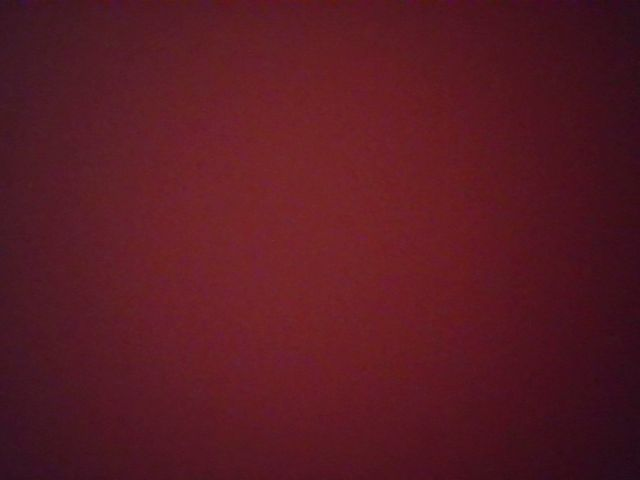

Signal sent to local server for Emergency Vehicle.
Prediction: Emergency Vehicle
Closing connections or resources.


In [ ]:
import sys
import socket
from IPython.display import display, Javascript, Image as IPImage
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image
import requests
import threading

# Function to send a command to the local server
def send_command(command):
    ngrok_url = 'https://999e-2405-201-c01d-f0fe-4861-61e3-e358-c55c.ngrok-free.app'  # Use your ngrok server address

    url = f'{ngrok_url}'
    try:
        requests.post(url, data={'command': command})
        print(f'Successfully sent command: {command}')
    except Exception as e:
        print(f'Failed to send command. Error: {str(e)}')

# Function to capture an image
def capture_image():
    filename = 'photo.jpg'
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        const stream = await navigator.mediaDevices.getUserMedia({ video: true });

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for the Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);

        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)

    # Use JavaScript to capture a photo and save it
    data = eval_js('takePhoto({})'.format(0.8))
    binary_data = b64decode(data.split(',')[1])

    # Remove special characters from the filename
    filename = ''.join(c for c in filename if c.isalnum() or c in ['_', '.'])

    with open(filename, 'wb') as f:
        f.write(binary_data)

    return filename

# Load the pre-trained model (adjust path if different)
model = torch.hub.load('facebookresearch/semi-supervised-ImageNet1K-models', 'resnet50_swsl')
model.fc = nn.Linear(2048, 2)  # Modify for 2 classes
model.eval()

# Define image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Get class labels from Cityscapes
class_labels = {0: 'Non-Emergency Vehicle', 1: 'Emergency Vehicle'}
emergency_vehicles = ["ambulance", "police", "fire truck"]
non_emergency_vehicles = ["bus", "bicycle", "truck", "car"]

try:
    # Capture an image
    filename = capture_image()
    print('Saved to {}'.format(filename))

    # Load the captured image as a PIL Image
    pil_image = Image.open(filename)

    # Display the resulting frame
    display(IPImage(filename=filename))

    # Preprocess the image
    frame_tensor = transform(pil_image).unsqueeze(0)
    if frame_tensor is None:  # Check for valid preprocessing output
        raise ValueError("Preprocessing produced a None output!")

    # Make prediction
    with torch.no_grad():
        output = model(frame_tensor)
        if output is None:  # Check for valid model output
            raise ValueError("Model returned a None output!")

    # Extract predicted class
    _, predicted = torch.max(output.data, 1)
    label_id = predicted.item()
    label_name = class_labels[label_id] if label_id in class_labels else f'Class {label_id}'

    # Send vehicle type to local server
    if label_name == "Emergency Vehicle":
        vehicle_type = 'E'  # Send 'E' for emergency
    else:
        vehicle_type = 'N'  # Send 'N' for non-emergency

    # Use threading for both cases
    threading.Thread(target=send_command, args=(vehicle_type,)).start()
    print(f'Signal sent to local server for {label_name}.')

    # Display result on the frame
    print(f'Prediction: {label_name}')

finally:
    # Close any open connections or resources here
    print("Closing connections or resources.")


In [ ]:
model = torch.hub.load('facebookresearch/semi-supervised-ImageNet1K-models', 'resnet50_swsl')  # Example using a semi-supervised ResNet50
model.fc = nn.Linear(2048, 2)  # Modify for 2 classes
model.eval()

NameError: name 'torch' is not defined

Using cache found in /root/.cache/torch/hub/facebookresearch_semi-supervised-ImageNet1K-models_master


<IPython.core.display.Javascript object>

Saved to photo.jpg


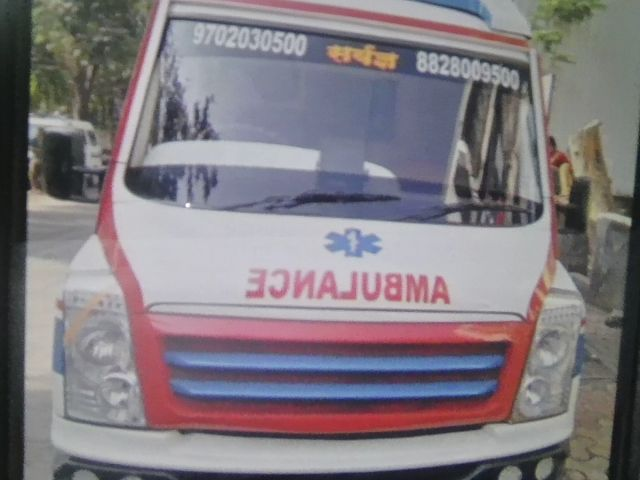

Signal sent to local server for Emergency Vehicle.
Prediction: Emergency Vehicle
Closing connections or resources.


In [ ]:
import sys
import socket
from IPython.display import display, Javascript, Image as IPImage
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image
import requests
import threading

# Function to send a command to the local server
def send_command(command):
    ngrok_url = 'https://46d1-2409-408c-2e9e-35c5-901b-83-6e67-d4ab.ngrok-free.app'  # Use your ngrok server address

    url = f'{ngrok_url}'
    try:
        requests.post(url, data={'command': command})
        print(f'Successfully sent command: {command}')
    except Exception as e:
        print(f'Failed to send command. Error: {str(e)}')

# Function to capture an image
def capture_image():
    filename = 'photo.jpg'
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        const stream = await navigator.mediaDevices.getUserMedia({ video: true });

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for the Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);

        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)

    # Use JavaScript to capture a photo and save it
    data = eval_js('takePhoto({})'.format(0.8))
    binary_data = b64decode(data.split(',')[1])

    # Remove special characters from the filename
    filename = ''.join(c for c in filename if c.isalnum() or c in ['_', '.'])

    with open(filename, 'wb') as f:
        f.write(binary_data)

    return filename

# Load the pre-trained model (adjust path if different)
model = torch.hub.load('facebookresearch/semi-supervised-ImageNet1K-models', 'resnet50_swsl')
model.fc = nn.Linear(2048, 2)  # Modify for 2 classes
model.eval()

# Define image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Get class labels from Cityscapes
class_labels = {0: 'Non-Emergency Vehicle', 1: 'Emergency Vehicle'}
emergency_vehicles = ["ambulance", "police", "fire truck"]
non_emergency_vehicles = ["bus", "bicycle", "truck", "car"]

try:
    # Capture an image
    filename = capture_image()
    print('Saved to {}'.format(filename))

    # Load the captured image as a PIL Image
    pil_image = Image.open(filename)

    # Display the resulting frame
    display(IPImage(filename=filename))

    # Preprocess the image
    frame_tensor = transform(pil_image).unsqueeze(0)
    if frame_tensor is None:  # Check for valid preprocessing output
        raise ValueError("Preprocessing produced a None output!")

    # Make prediction
    with torch.no_grad():
        output = model(frame_tensor)
        if output is None:  # Check for valid model output
            raise ValueError("Model returned a None output!")

    # Extract predicted class
    _, predicted = torch.max(output.data, 1)
    label_id = predicted.item()
    label_name = class_labels[label_id] if label_id in class_labels else f'Class {label_id}'

    # Send vehicle type to local server
    if label_name == "Emergency Vehicle":
        vehicle_type = 'E'  # Send 'E' for emergency
    else:
        vehicle_type = 'N'  # Send 'N' for non-emergency

    # Use threading for both cases
    threading.Thread(target=send_command, args=(vehicle_type,)).start()
    print(f'Signal sent to local server for {label_name}.')

    # Display result on the frame
    print(f'Prediction: {label_name}')

finally:
    # Close any open connections or resources here
    print("Closing connections or resources.")


**Flutter** **trail**- https://youtu.be/B9hsWOCXb_o?si=umv_ZbgwGVJJc48t